In [143]:
import json
from pprint import pprint
import matplotlib.pyplot as plt
import gmplot
import numpy as np
import math
from pprint import pprint
import matplotlib.pyplot as plt
import random
from math import sin, cos, sqrt, atan2, radians

In [144]:


with open('data.json') as data_file:    
    data = json.load(data_file)
z=data['Homeless']
coordinates=[]
for k,v in z.items():
    loc=(v['loc_data'])
    u=[]
    u.append(float(loc['latitude']))
    u.append(float(loc['longitude']))
    coordinates.append(u)


z=[[36.83414915357137, 10.168730802834034],
  [6.184225161803403, -0.43260645121335983],
  [36.845354476795784, 10.171702690422535],
  [-13.827427862949072, 1.9466178864240646],
  [36.85116176229938, 10.194187648594378],
  [36.82740209180303, 10.160890035331251]]

for i in z:
    coordinates.remove(i)


In [145]:

def get_distance(p1,p2):
    

# approximate radius of earth in km
    R = 6373.0

    lat1 = radians(p1[0])
    lon1 = radians(p1[1])
    lat2 = radians(p2[0])
    lon2 = radians(p2[1])

    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))

    distance = R * c
    return distance

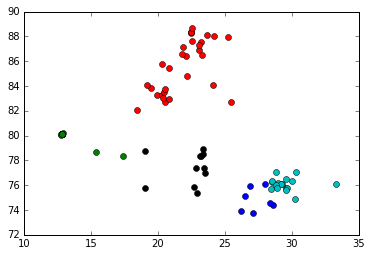

In [146]:
points=coordinates
k=6
heads=[]
clusters=[]
heads=random.sample(points, k)

new_clusters=[[]for i in range(k)]
    

new_heads=[]
c=3
while c>0:
    for i in points:
        mini=999999
        c_no=0
        for j in range(k):
            h=get_distance(i,heads[j])
            if h<mini:
                mini=h
                c_no=j
        if i not in heads:
            new_clusters[c_no].append(i)
  
    for i in new_clusters:
        x_c=0
        y_c=0
        for j in i:
            x_c+=j[0]
            y_c+=j[1]
        if len(i) !=0:
            x_c=x_c/float(len(i))
            y_c=y_c/float(len(i))
        u=[x_c,y_c]
        new_heads.append(u)
        
    #pprint(new_heads)
    if clusters==new_clusters:
        break
    else:
        clusters=new_clusters
        new_clusters=[[]for i in range(k)]
        heads=new_heads
        new_heads=[]
   
colors=['ro','go','yo','bo','ko','co','mo']

for i in range(k):
    for j in new_clusters[i]:
        plt.plot(j[0],j[1],colors[i])
plt.show()



In [147]:
sorted_cluster=[]
max_len=0
temp=[]

for j in range(k):
    for i in new_clusters:
        l=len(i)
        if l>max_len:
            temp=i
            max_len=l
    new_clusters.remove(temp)
    sorted_cluster.append(temp)
    temp=[]
    max_len=0

new_clusters=sorted_cluster

In [148]:
gmap= gmplot.GoogleMapPlotter(25.54, 80.553, 5)
color=['red','brown','yellow','blue','pink','green','black']
color_chooser=0
for i in new_clusters:
    lats=[]
    lons=[]
    for j in i:
        lats.append(j[0])
        lons.append(j[1])
    gmap.scatter(lats, lons, color[color_chooser],size=100, marker=True)
    color_chooser+=1
gmap.draw('map.html')